In [1]:
import os
os.chdir('../py/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lattices import *
from numbertheory import *

We explain how to obtain the analytic model of an algebraic elliptic curve mod $p$.

Say we want to visualize the curve:
$$ y^2 = x^3 + 3x \pmod 5$$

The first step is computing the trace of Frobenius (or equivalently the number of points defined over $\mathbb{F}_p$.)

In [3]:
trace_frob((3,0),5)

-4

The trace of Frobenius is -4, which tells us:
* There are 5-(-4)+1 = 10 points on $E$.
* Frobenius acts like multiplication by $-2+i$.
* The endomorphism ring of the analytic lift is $\mathbb{Z}[i]$.

Now, we know that there is only one lattice with that endomorphism ring - in general, to obtain the set of lattices with endomorphism ring $\mathcal{O}_d$, we can use:

In [4]:
get_cl_reps(-4)

[(1, 0, 1)]

The output of this function is a triple collection $(a,b,c)$;
the triple $(a,b,c)$ represents the lattice spanned by $\tau,1$,
where $\tau$ is the root of $ax^2+bx+c = 0$ in the upper half plane.

The function 'mw_gens' takes as input the following data:
* The coefficients $(t,p)$ of the characteristic polynomial of Frobenius ($x^2-tx+p$ - for the example, this is $x^2+4x+5$).
* The coefficients $(a,b,c)$ of the minimal polynomial of $\tau$.
* An integer $n\geq 1$.

It will return a dictionary meant to be interpreted in the following way:
* The keys are tuples $(a,b)$, where $a,b$ are integers.
Each key represents a generator of the form $(a + b\tau)/n$.
* The value of $(a,b)$ indicates the order of $(a + b\tau)/n$.
* If the dictionary has only one value $(a,b):n$, that means the group is cyclic, and can be generated by $\frac{a+b\tau}{n}$.
* Otherwise, the dictionary has two values $(a_1,b_1):n_1,(a_2,b_2):n_2$,
and the group is generated by $e_1 := \frac{a_1+b_1\tau}{\max (n_1,n_2)},e_2:= \frac{a_2+b_2\tau}{\max (n_1,n_2)}$.
Note that $n_1, n_2$ are chosen so $\min (n_1, n_2) | \max (n_1, n_2)$.

We can generate all points (with no redundancy)
by computing the set of linear combinations $x e_1 + y e_2$
where $0 \leq x < n_1$ and $0 \leq y < n_2$.

In [21]:
mw_gens((-4,5),(1,0,1),1)

{(1, 7): 10}

In [22]:
mw_gens((-4,5),(1,0,1),6)

{(3943, 3906): 7930, (0, 3965): 2}

We can obtain the list of points from the generating set + the tuple $(a,b,c)$ that represent tau using the function 'mw_arr_from_gens'.

In [24]:
mw_arr_from_gens(mw_gens((-4,5),(1,0,1),1),(1,0,1))

array([[0. , 0. ],
       [0.1, 0.7],
       [0.2, 0.4],
       [0.3, 0.1],
       [0.4, 0.8],
       [0.5, 0.5],
       [0.6, 0.2],
       [0.7, 0.9],
       [0.8, 0.6],
       [0.9, 0.3]])

The list can then be exported to a text file.

The output of the previous function can be exported using 
export_points(pointgroup,filename.txt)

In [26]:
export_points(mw_arr_from_gens(mw_gens((-4,5),(1,0,1),1),(1,0,1)),'test.txt')

In [31]:
mwar_test = mw_arr((-4,11),(1,1,2),3)

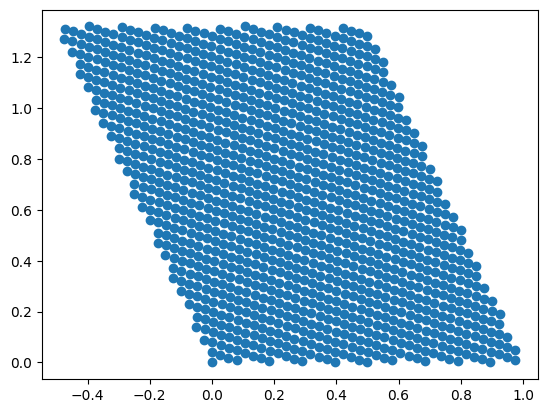

In [32]:
plt.scatter(x =mwar_test[::,0],y=mwar_test[::,1])

## Labels

Given a pair $(d,m)$, where $d < 0$ is a fundamental discriminant
and $m>0$ an integer,
we can obtain a set of labels for the lattices whose endomorphism ring has discriminant $d$ and conductor dividing $m$.

The label are strings consisting of letters and numbers.
If the label is a letter, then the endomorphism ring of that lattice is maximal - i..e it is equal to the ring of integers of the fraction field.
Otherwise, the label has the form s0 + 'p'+'x', where:
* s0 is the label of some other lattice.
* 'p' is an integer (in fact a prime number)
* 'x' is a letter.
This means two things:
* The conductor of the lattice with label s0+'p'+'x' is equal to p times the conductor of the lattice with label s0.
* There is an isogeny of degree $p$ between the curves with labels s0 and s0 + 'p'+'x'.

The meaning is not particularly important for now,
but using this labelling will be helpful if we want to keep track of isogeny graphs later on.

In [33]:
iso_tree_dm_labels(-4,12)

{'a': (1, 0, 1),
 'a2a': (1, 0, 4),
 'a2a2a': (4, 4, 5),
 'a2a2b': (1, 0, 16),
 'a3a': (2, 2, 5),
 'a3b': (1, 0, 9),
 'a2a3a': (4, 0, 9),
 'a2a3b': (1, 0, 36),
 'a2a3c': (5, 4, 8),
 'a2a3d': (5, -4, 8),
 'a2a2a3a': (5, 2, 29),
 'a2a2a3b': (13, 10, 13),
 'a2a2a3c': (5, -2, 29),
 'a2a2a3d': (4, 4, 37),
 'a2a2b3a': (9, -6, 17),
 'a2a2b3b': (9, 0, 16),
 'a2a2b3c': (1, 0, 144),
 'a2a2b3d': (9, 6, 17)}


Given a pair $(a,p)$,
we can find all lattices needed to represent curves with characteristic polynomial $x^2 - ax + p$ using the output of the labelling function.

The function 'ptgroupdata_all' takes as input a pair $(a,p)$,
and an integer $n$,
and returns a dictionary with the following:
* Minimal polynomials for each $\tau$ needed for the pictures.
* A pair of vectors $(x_1,y_1),(x_2,y_2) \in \mathbb{Z}$, and a denominator $m$, that can be used to generate the group of $\mathbb{F}_{p^n}$ points (each vector $(x,y)$ represents $\frac{x+y\tau}{m} \pmod \Lambda$ on the elliptic curve).

In [17]:
ptgroupdata_all((-3,17),1)

{'a': {'tau_minpoly': (1, 1, 15),
  'generators': {(15, 19): 21},
  'denominator': 21},
 'b': {'tau_minpoly': (3, 1, 5),
  'generators': {(15, 19): 21},
  'denominator': 21},
 'c': {'tau_minpoly': (3, -1, 5),
  'generators': {(2, 1): 21},
  'denominator': 21}}